# Model to predict revenue through adds

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#sklearn Packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [69]:
#importing dataset

df = pd.read_csv("Train_Data.csv")
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [70]:
#df information
print(df.info())
print("The shape of the dataset is {}".format(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB
None
The shape of the dataset is (4571, 9)


In [71]:
#Cheacking for NAN values
print(df.isnull().sum())

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64


In [134]:
#value_counts of object dtypes
print(df.campaign.value_counts())
print(df.adgroup.value_counts())
print(df.ad.value_counts())

campaign 1    4571
Name: campaign, dtype: int64
adgroup 3    1672
adgroup 1    1314
adgroup 4     858
adgroup 2     727
Name: adgroup, dtype: int64
ad 3     617
ad 1     587
ad 2     512
ad 7     461
ad 32    377
        ... 
ad 24      4
ad 31      4
ad 69      4
ad 39      4
ad 51      3
Name: ad, Length: 70, dtype: int64


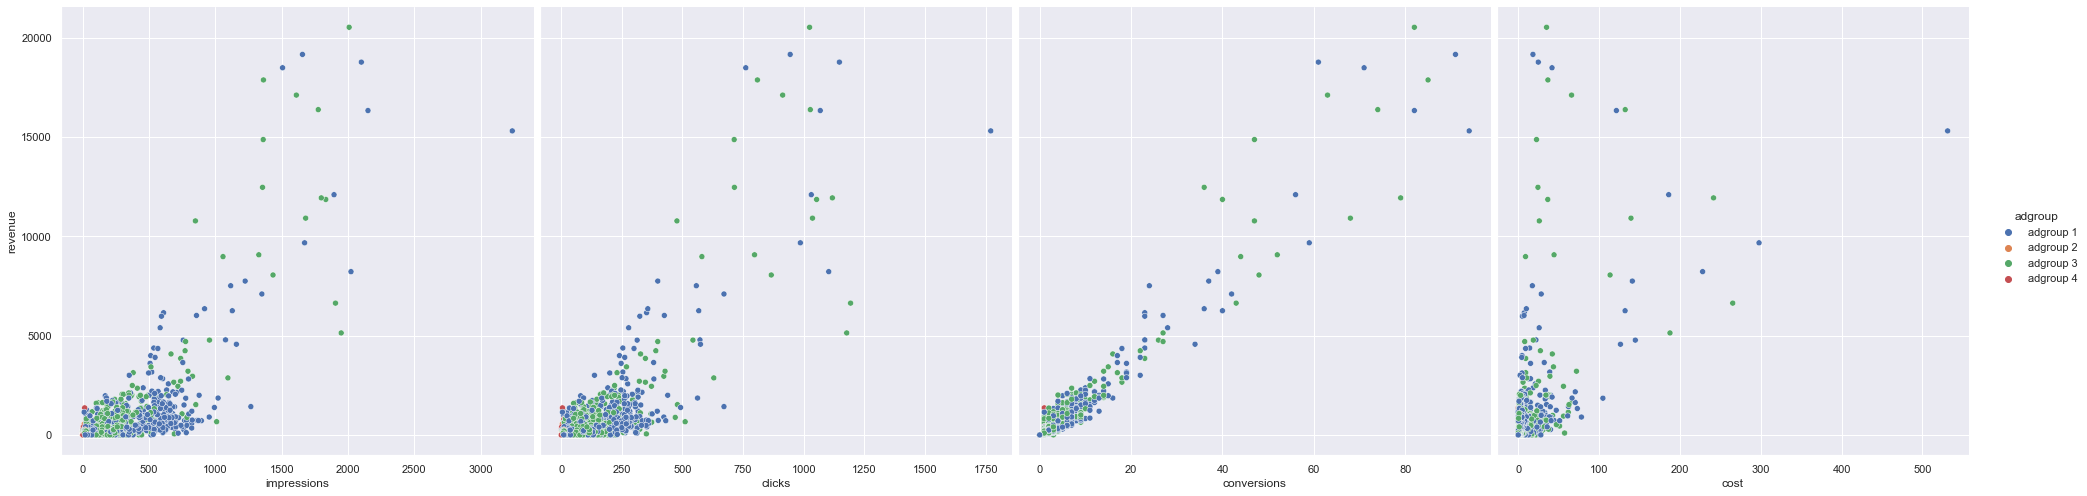

In [73]:
#EDA
sns.pairplot(df,x_vars = ["impressions","clicks","conversions","cost"], y_vars = "revenue", height = 7, hue = "adgroup")
plt.show()

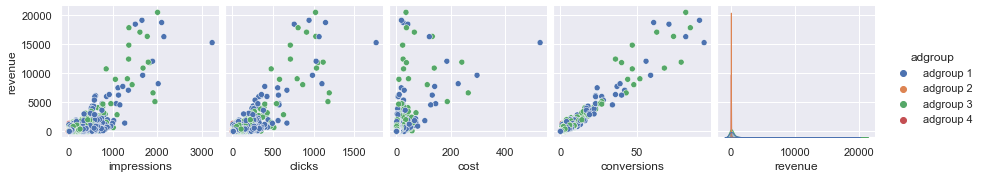

In [74]:
sns.pairplot(df, hue = "adgroup", y_vars = "revenue")
plt.show()

C:\Users\iftaq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='impressions', ylabel='Density'>

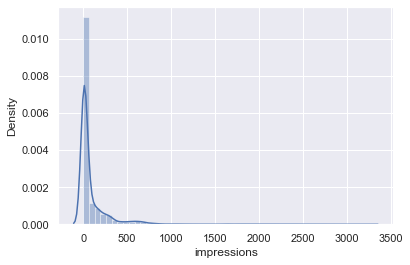

In [75]:
sns.distplot(df.impressions)

In [76]:
df_nw = df.copy() #making a copy of new dataset

In [77]:
df_nw.shape

(4571, 9)

In [78]:
df_nw.drop(["date","campaign"],axis = 1 , inplace = True)

In [79]:
df_nw.shape

(4571, 7)

In [80]:
df_nw.head()

,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,adgroup 1,ad 1,24,6,0.08,0,0.00
1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,adgroup 3,ad 1,13,4,0.04,0,0.00
3,adgroup 4,ad 1,5,4,0.08,0,0.00
4,adgroup 1,ad 2,247,126,1.29,4,925.71


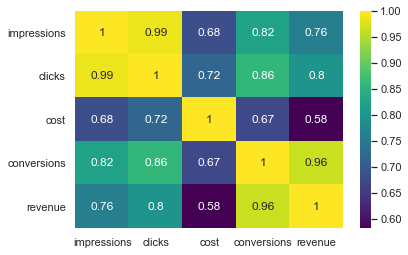

In [81]:
sns.heatmap(df_nw.corr(),annot = True, cmap = "viridis")
plt.show()

In [82]:
df.ad.value_counts().sort_values(ascending = False).head(20)

ad 3     617
ad 1     587
ad 2     512
ad 7     461
ad 32    377
ad 10    235
ad 6     180
ad 8     180
ad 4     174
ad 5     174
ad 55    134
ad 56    133
ad 54     54
ad 53     51
ad 17     37
ad 26     35
ad 60     33
ad 13     32
ad 52     25
ad 66     23
Name: ad, dtype: int64

In [83]:
top_10ad = [x for x in df.ad.value_counts().sort_values(ascending = False).head(10).index ]
top_10ad

['ad 3',
 'ad 1',
 'ad 2',
 'ad 7',
 'ad 32',
 'ad 10',
 'ad 6',
 'ad 8',
 'ad 4',
 'ad 5']

In [84]:
df_nw.shape

(4571, 7)

In [85]:
for i in top_10ad:
    df[i] = np.where(df["ad"] == i ,1, 0)

ad_code = df[["ad"] + top_10ad]

In [86]:
ad_code.shape

(4571, 11)

In [87]:
df_nw.shape

(4571, 7)

In [88]:
df_nw.head()

,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,adgroup 1,ad 1,24,6,0.08,0,0.00
1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,adgroup 3,ad 1,13,4,0.04,0,0.00
3,adgroup 4,ad 1,5,4,0.08,0,0.00
4,adgroup 1,ad 2,247,126,1.29,4,925.71


In [89]:
df_nw = pd.concat([df_nw,ad_code],axis = 1)
df_nw.head()

,adgroup,ad,impressions,clicks,cost,conversions,revenue,ad,ad 3,ad 1,ad 2,ad 7,ad 32,ad 10,ad 6,ad 8,ad 4,ad 5
0,adgroup 1,ad 1,24,6,0.08,0,0.00,ad 1,0,1,0,0,0,0,0,0,0,0
1,adgroup 2,ad 1,1,0,0.00,0,0.00,ad 1,0,1,0,0,0,0,0,0,0,0
2,adgroup 3,ad 1,13,4,0.04,0,0.00,ad 1,0,1,0,0,0,0,0,0,0,0
3,adgroup 4,ad 1,5,4,0.08,0,0.00,ad 1,0,1,0,0,0,0,0,0,0,0
4,adgroup 1,ad 2,247,126,1.29,4,925.71,ad 2,0,0,1,0,0,0,0,0,0,0


In [90]:
df_nw.drop("ad", axis =1 ,inplace = True)

In [91]:
#df_nw = pd.get_dummies(df, drop_first = True)

In [92]:
df_nw.shape

(4571, 16)

In [93]:
df_nw.head()

,adgroup,impressions,clicks,cost,conversions,revenue,ad 3,ad 1,ad 2,ad 7,ad 32,ad 10,ad 6,ad 8,ad 4,ad 5
0,adgroup 1,24,6,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0
1,adgroup 2,1,0,0.00,0,0.00,0,1,0,0,0,0,0,0,0,0
2,adgroup 3,13,4,0.04,0,0.00,0,1,0,0,0,0,0,0,0,0
3,adgroup 4,5,4,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0
4,adgroup 1,247,126,1.29,4,925.71,0,0,1,0,0,0,0,0,0,0


In [94]:
adgrp_code = pd.get_dummies(df_nw.adgroup, drop_first = True)
adgrp_code

,adgroup 2,adgroup 3,adgroup 4
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,0
...,...,...,...
4566,0,1,0
4567,0,0,1
4568,0,1,0
4569,0,0,0


In [95]:
df_nw = pd.concat([df_nw,adgrp_code], axis = 1)

In [96]:
df_nw.shape

(4571, 19)

In [97]:
df_nw.head()

,adgroup,impressions,clicks,cost,conversions,revenue,ad 3,ad 1,ad 2,ad 7,ad 32,ad 10,ad 6,ad 8,ad 4,ad 5,adgroup 2,adgroup 3,adgroup 4
0,adgroup 1,24,6,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0
1,adgroup 2,1,0,0.00,0,0.00,0,1,0,0,0,0,0,0,0,0,1,0,0
2,adgroup 3,13,4,0.04,0,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0
3,adgroup 4,5,4,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1
4,adgroup 1,247,126,1.29,4,925.71,0,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
df_nw.drop("adgroup", axis = 1,inplace = True)

In [99]:
df_nw.head()

,impressions,clicks,cost,conversions,revenue,ad 3,ad 1,ad 2,ad 7,ad 32,ad 10,ad 6,ad 8,ad 4,ad 5,adgroup 2,adgroup 3,adgroup 4
0,24,6,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0.00,0,0.00,0,1,0,0,0,0,0,0,0,0,1,0,0
2,13,4,0.04,0,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0
3,5,4,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1
4,247,126,1.29,4,925.71,0,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
X = df_nw.drop("revenue", axis = 1)
y = df_nw.revenue

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.25,random_state = 1)

In [102]:
#linear_regression model
lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)

LinearRegression()

In [103]:
lr_model1.score(X_train,y_train)

0.9430394213714021

In [104]:
lr_model1.score(X_test,y_test)

0.9333730520718654

In [105]:
lr_model1_val = lr_model1.predict(X_test)

In [106]:
mse = mean_squared_error(y_test,lr_model1_val)
mse

83004.51063298475

In [107]:
rmse = np.sqrt(mse)
rmse

288.10503402923166

In [108]:
#lasso model
ls_model1 = Lasso(alpha = 0.1)
ls_model1.fit(X_train,y_train)

Lasso(alpha=0.1)

In [109]:
ls_model1.score(X_test,y_test)

0.9333841283990477

In [110]:
mse = mean_squared_error(y_test,ls_model1.predict(X_test))
mse

82990.71163504216

In [111]:
rmse = np.sqrt(mse)
rmse

288.08108517402206

In [112]:
rd_model1 = Ridge(alpha = 5)
rd_model1.fit(X_train,y_train)

Ridge(alpha=5)

In [113]:
rd_model1.score(X_test,y_test)

0.9332845637982935

In [114]:
rmse = np.sqrt(mean_squared_error(y_test,rd_model1.predict(X_test)))
rmse

288.29628891004

In [115]:
dt_model1 = DecisionTreeRegressor()
dt_model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [116]:
dt_model1.score(X_test,y_test)

0.8580248223083287

In [117]:
df_test = pd.read_csv("Test_Data.csv")
df_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [118]:
df_test.drop(["date","campaign"],axis = 1 , inplace = True)

In [119]:
for i in top_10ad:
    df_test[i] = np.where(df_test["ad"] == i ,1, 0)

ad_code = df_test[["ad"] + top_10ad]

In [120]:
df_test.head()

,adgroup,ad,cost,impressions,clicks,conversions,ad 3,ad 1,ad 2,ad 7,ad 32,ad 10,ad 6,ad 8,ad 4,ad 5
0,adgroup 1,ad 1,0.58,121,49,1,0,1,0,0,0,0,0,0,0,0
1,adgroup 3,ad 1,0.17,22,12,0,0,1,0,0,0,0,0,0,0,0
2,adgroup 4,ad 1,0.05,5,3,0,0,1,0,0,0,0,0,0,0,0
3,adgroup 2,ad 1,0.01,2,1,0,0,1,0,0,0,0,0,0,0,0
4,adgroup 2,ad 2,0.01,3,1,0,0,0,1,0,0,0,0,0,0,0


In [121]:
adgrp_code = pd.get_dummies(df_test.adgroup, drop_first = True)
adgrp_code

,adgroup 2,adgroup 3,adgroup 4
0,0,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
313,0,0,1
314,0,1,0
315,0,0,0
316,0,1,0


In [122]:
df_test = pd.concat([df_test,adgrp_code], axis = 1)

In [123]:
df_test.drop("adgroup", axis = 1,inplace = True)

In [124]:
df_nw.head()

,impressions,clicks,cost,conversions,revenue,ad 3,ad 1,ad 2,ad 7,ad 32,ad 10,ad 6,ad 8,ad 4,ad 5,adgroup 2,adgroup 3,adgroup 4
0,24,6,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0.00,0,0.00,0,1,0,0,0,0,0,0,0,0,1,0,0
2,13,4,0.04,0,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0
3,5,4,0.08,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1
4,247,126,1.29,4,925.71,0,0,1,0,0,0,0,0,0,0,0,0,0


In [125]:
df_test.shape

(318, 18)

In [126]:
df.shape

(4571, 19)

In [127]:
df_test

,ad,cost,impressions,clicks,conversions,ad 3,ad 1,ad 2,ad 7,ad 32,ad 10,ad 6,ad 8,ad 4,ad 5,adgroup 2,adgroup 3,adgroup 4
0,ad 1,0.58,121,49,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,ad 1,0.17,22,12,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,ad 1,0.05,5,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,ad 1,0.01,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,ad 2,0.01,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,ad 55,0.01,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
314,ad 55,0.01,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
315,ad 55,0.14,25,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
316,ad 56,0.06,9,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [128]:
df_test.drop("ad",inplace = True,axis = 1)

In [129]:
X_train.shape

(1142, 17)

In [130]:
df_test.shape

(318, 17)

In [131]:
target = lr_model1.predict(df_test)

In [132]:
target

array([ 1.14262196e+02, -6.19537317e+01,  5.91257805e+00,  1.27519432e+01,
       -5.45996084e+01, -5.86601621e+01, -1.43284215e+02,  5.23162768e+00,
       -2.01626739e+01, -3.23634731e+01,  4.44882500e+02, -9.29880068e+01,
       -2.44872435e+01,  1.74143635e+00,  1.04930564e+01,  1.97370497e+02,
       -5.14588525e+01,  4.26805927e+01, -5.56531167e+01,  1.02978968e+02,
        2.67055323e+01, -9.95255938e+01,  7.49156629e+00,  2.44082128e+02,
       -5.06209738e+01, -5.98599853e+01,  5.60942846e+02, -1.13805430e+02,
       -2.20912726e+01, -4.74332683e+00,  4.95405278e+02, -1.64480552e+01,
        7.48665630e+02,  3.48942765e+02,  1.50333005e+02,  1.79499260e+01,
        4.12784526e+01, -1.20949225e+01,  2.17180550e+01, -5.00563065e+01,
       -3.60341536e+01, -8.01344093e+01, -7.23706546e+00, -9.97315537e+01,
       -7.16143604e+01, -1.37913578e+01, -4.50866424e+01, -1.56171831e+01,
       -1.90338971e+02, -8.04351746e-02,  2.10138102e+01, -3.70555156e+01,
       -8.57079806e+01,  

In [133]:
res = pd.DataFrame(target)
res.columns = ["revenue"]
res.to_csv("prediction_results_revenue2.csv", index = False)